In [ ]:
#### TODO
# precision variables
# network without delay
# network with delay

In [305]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import random

path = os.getcwd().split(os.sep + 'Jacobian')[0]
if path not in sys.path:
    sys.path.append(path)

%load_ext autoreload
%autoreload 2

from neurolib.models.fhn import FHNModel
from neurolib.models.hopf import HopfModel
from neurolib.models.wc import WCModel

from neurolib.utils import jacobian as jac
from neurolib.utils import adjoint as adj

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


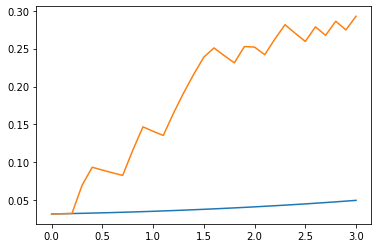

In [383]:
model = FHNModel()
model = HopfModel()
model = WCModel()

dur0 = 1000.
dt = model.params.dt
T = int(dur0/dt)+1
model.params.duration = dur0
model.run()
init = jac.get_fullstate(model, model.state_vars, model.params.N, 2, T)[:,:,-1]

input_vars = model.input_vars
dur = 3.
T = np.around(1+dur/dt,0).astype(int)
model.params.duration = dur
jac.set_init(model, init, model.init_vars, model.state_vars)
model.run()
start = jac.get_fullstate(model, model.state_vars, model.params.N, 2, T)
plt.plot(model.t, start[0,0,:])

N = model.params.N

u0 = np.zeros(( N,len(input_vars),T ))
u_stim = np.zeros(( N,len(input_vars),T ))

v_control = np.array( [None] * N )
v_control[0] = [0]

if model.name in ['wc']:
    maxcontrol = 50.
else:
    maxcontrol = 5.

for t in np.arange(2, T-1, 1):
    for n in range(N):
        for v in v_control[n]:
            u_stim[n,v,t] = random.uniform( - 0.9 * maxcontrol, 0.9 * maxcontrol )
                
for iv in range(len(input_vars)):
    model.params[input_vars[iv]] = u_stim[:,iv,:]

jac.set_init(model, init, model.init_vars, model.state_vars)
model.run()
target = jac.get_fullstate(model, model.state_vars, model.params.N, 2, T)
plt.plot(model.t, target[0,0,:])
plt.show()

Initial cost =  0.5943985539155366
1  cost =  0.04621534791883983
2  cost =  0.03949549791096137
3  cost =  0.03681944462627255
4  cost =  0.02441801649632955
5  cost =  0.015511463195559122
6  cost =  0.014462835717210576
7  cost =  0.013956796811271774
8  cost =  0.004316246078117725
9  cost =  0.003432673565755236
10  cost =  0.003401491485619423
50  cost =  0.0018186659137217473
100  cost =  0.0013340818989198905
150  cost =  0.0009875172953809086
200  cost =  0.0007680129354975358
250  cost =  0.0006178716631780092
300  cost =  0.0004979471322100965
350  cost =  0.0004070092093900562
400  cost =  0.00033655732149031676
450  cost =  0.0002800925399898264
500  cost =  0.00023450254616368333
550  cost =  0.00019750065610435412
600  cost =  0.00016711072075487236
650  cost =  0.00014179281831836916
700  cost =  0.00012073612467880633
750  cost =  0.00010300239149490536
800  cost =  8.811001754100547e-05
850  cost =  7.557558741870135e-05
900  cost =  6.530985979062954e-05
950  cost = 

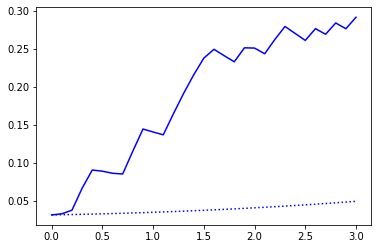

In [384]:
w = 0.
iterations = 1000

u1, costlist1 = adj.opt_c(model, iterations, init, target, w, u0, v_control, maxcontrol, method='generic')

model.params.x_ext = u1[:,0,:]
model.params.y_ext = u1[:,1,:]

jac.set_init(model, init, model.init_vars, model.state_vars)
model.run()
state1 = jac.get_fullstate(model, model.state_vars, model.params.N, 2, T)
plt.plot(model.t, start[0,0,:], linestyle=':', color='blue')
plt.plot(model.t, state1[0,0,:], color='blue')
plt.show()

Initial cost =  0.5943985539155366
1  cost =  0.04571918494784035
2  cost =  0.04358575086192685
3  cost =  0.04071001935371917
4  cost =  0.038173102302166646
5  cost =  0.036144345869376496
6  cost =  0.03437003264997456
7  cost =  0.03262203593765951
8  cost =  0.031064779407830354
9  cost =  0.029497771941008062
10  cost =  0.02802349114372575
50  cost =  0.003077201615430363
100  cost =  0.002518886894607913
150  cost =  0.0022917308791074002
200  cost =  0.0020529530708869805
250  cost =  0.0016464232321507202
300  cost =  0.0014432736978394127
350  cost =  0.0013762147479058097
400  cost =  0.0012958032477277902
450  cost =  0.0012109028052837683
500  cost =  0.0010902226512872544
550  cost =  0.0009671889375831918
600  cost =  0.0008390560475919584
650  cost =  0.0006932504425866975
700  cost =  0.0005651379978526493
750  cost =  0.0005020772700841065
800  cost =  0.0004370077360868174
850  cost =  0.00038808162728986586
900  cost =  0.00035072693616836173
950  cost =  0.000312

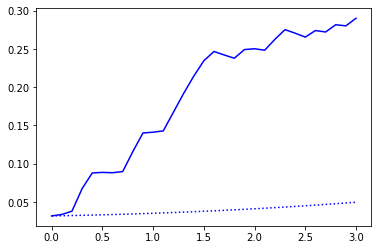

In [385]:
u2, costlist2 = adj.opt_c(model, iterations, init, target, w, u0, v_control, maxcontrol, method='analytic')

model.params.x_ext = u2[:,0,:]
model.params.y_ext = u2[:,1,:]

jac.set_init(model, init, model.init_vars, model.state_vars)
model.run()
state2 = jac.get_fullstate(model, model.state_vars, model.params.N, 2, T)
plt.plot(model.t, start[0,0,:], linestyle=':', color='blue')
plt.plot(model.t, state2[0,0,:], color='blue')
plt.show()

In [302]:
maxdiff = 0.

for t in np.arange(10,10000, 1000):
    print(t)
    model = FHNModel()
    model.run()
    x = np.transpose(np.array( [model.x[:,t], model.y[:,t] ]))
    diff = jac.jacobian_fhn(x, model) - jac.generic_jacobian(x, model)
    if np.amax(np.abs(diff)) > maxdiff:
        maxdiff = np.amax(np.abs(diff))
        
print(maxdiff)

10
1010
2010
3010
4010
5010
6010
7010
8010
9010
0.039263090256842936


In [303]:
maxdiff = 0.

for t in np.arange(10,10000, 1000):
    print(t)
    model = HopfModel()
    model.run()
    x = np.transpose(np.array( [model.x[:,t], model.y[:,t] ]))
    diff = jac.jacobian_hopf(x, model) - jac.generic_jacobian(x, model)
    if np.amax(np.abs(diff)) > maxdiff:
        maxdiff = np.amax(np.abs(diff))
        
print(maxdiff)

10
1010
2010
3010
4010
5010
6010
7010
8010
9010
0.015053190976855091
